# Objective

* Build a Model which identify the customer buy clothes or not
* Yes = Customer buy clothes( GOOD Customers ) , No = Customer not buy clothes ( BAD  Customers )

In [1]:
import numpy as np 
import pandas as pd  
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns 
warnings.filterwarnings("ignore")

/Users/dhruvvarsani/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv (r"clothing_purchase.csv")
df.head()

CustomerID  Age  Gender Income_Level  Website_Visits  Time_on_Site  \
0           1   43  Female       Medium               3     92.787454   
1           2   50  Female         High              35    101.131331   
2           3   54    Male       Medium              33     74.505656   
3           4   32  Female       Medium              22     77.686357   
4           5   19    Male          Low              44      4.372157   

   Clicked_Clothing_Ad Product_Viewed  Added_to_Cart  Email_Discount_Received  \
0                    0          Dress              1                        1   
1                    1          Dress              1                        0   
2                    0          Shirt              0                        0   
3                    0          Dress              0                        1   
4                    0          Shirt              1                        1   

   Purchased_Before  Purchase  
0                 1         1  
1                 1         1  
2                 0         0  
3                 0         0  
4                 1         0

# Step 2 : Data Pre-Processing

### Removing Irrelavent Variable

In [4]:
df = df.drop(['CustomerID'],axis=1)
df.columns

Index(['Age', 'Gender', 'Income_Level', 'Website_Visits', 'Time_on_Site',
       'Clicked_Clothing_Ad', 'Product_Viewed', 'Added_to_Cart',
       'Email_Discount_Received', 'Purchased_Before', 'Purchase'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1000 non-null   int64  
 1   Gender                   1000 non-null   object 
 2   Income_Level             1000 non-null   object 
 3   Website_Visits           1000 non-null   int64  
 4   Time_on_Site             1000 non-null   float64
 5   Clicked_Clothing_Ad      1000 non-null   int64  
 6   Product_Viewed           1000 non-null   object 
 7   Added_to_Cart            1000 non-null   int64  
 8   Email_Discount_Received  1000 non-null   int64  
 9   Purchased_Before         1000 non-null   int64  
 10  Purchase                 1000 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 86.1+ KB


### Outlier

<AxesSubplot:>

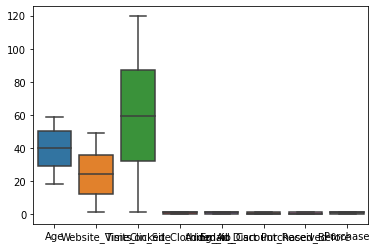

In [7]:
sns.boxplot(data=df)

In [8]:
df.isna().sum()

Age                        0
Gender                     0
Income_Level               0
Website_Visits             0
Time_on_Site               0
Clicked_Clothing_Ad        0
Product_Viewed             0
Added_to_Cart              0
Email_Discount_Received    0
Purchased_Before           0
Purchase                   0
dtype: int64

## Purchaes Rate Analysis

In [10]:
df.Purchase.value_counts(normalize=True)

1    0.529
0    0.471
Name: Purchase, dtype: float64

In [11]:
import plotly.express as px

fig = px.pie(df,names='Purchase',color='Purchase',color_discrete_map={1:'purple',0:'green'})
fig.show()

In [12]:
df.Purchase.value_counts()

1    529
0    471
Name: Purchase, dtype: int64

In [14]:
Customer_buy = df.loc[df["Purchase"] == 1,:]
Customer_buy

Age  Gender Income_Level  Website_Visits  Time_on_Site  \
0     43  Female       Medium               3     92.787454   
1     50  Female         High              35    101.131331   
5     58    Male          Low               9     99.595101   
8     21    Male         High              29     85.332530   
9     37  Female         High              39     26.567698   
..   ...     ...          ...             ...           ...   
993   37    Male          Low              10     98.614862   
995   47    Male         High              36     27.358625   
996   34  Female          Low              28     61.930783   
997   27    Male          Low              24     66.312169   
999   37    Male          Low              37     68.243781   

     Clicked_Clothing_Ad Product_Viewed  Added_to_Cart  \
0                      0          Dress              1   
1                      1          Dress              1   
5                      1          Shoes              1   
8                      1          Shirt              1   
9                      1          Shirt              1   
..                   ...            ...            ...   
993                    1         Jacket              1   
995                    1          Dress              1   
996                    1          Shirt              1   
997                    1          Dress              0   
999                    0          Dress              1   

     Email_Discount_Received  Purchased_Before  Purchase  
0                          1                 1         1  
1                          0                 1         1  
5                          0                 0         1  
8                          0                 1         1  
9                          0                 1         1  
..                       ...               ...       ...  
993                        1                 1         1  
995                        0                 1         1  
996                        1                 1         1  
997                        1                 1         1  
999                        0                 1         1  

[529 rows x 11 columns]

In [16]:
fig = px.sunburst(Customer_buy, path=["Purchased_Before","Age","Gender","Time_on_Site"])
fig.show()

## Taking subset data of Number

In [18]:
customer_num = df.select_dtypes(include=[np.number])
customer_num.head(5)

Age  Website_Visits  Time_on_Site  Clicked_Clothing_Ad  Added_to_Cart  \
0   43               3     92.787454                    0              1   
1   50              35    101.131331                    1              1   
2   54              33     74.505656                    0              0   
3   32              22     77.686357                    0              0   
4   19              44      4.372157                    0              1   

   Email_Discount_Received  Purchased_Before  Purchase  
0                        1                 1         1  
1                        0                 1         1  
2                        0                 0         0  
3                        1                 0         0  
4                        1                 1         0

In [21]:
customer_obj = df.select_dtypes(include=["object"])
customer_obj.head(5)

Gender Income_Level Product_Viewed
0  Female       Medium          Dress
1  Female         High          Dress
2    Male       Medium          Shirt
3  Female       Medium          Dress
4    Male          Low          Shirt

## Converting Quality Variable to Number

In [22]:
from sklearn.preprocessing import LabelEncoder
customer_obj = customer_obj.apply(LabelEncoder().fit_transform)
customer_obj.head(3)

Gender  Income_Level  Product_Viewed
0       0             2               0
1       0             0               0
2       1             2               3

In [23]:
customer_combined = pd.concat([customer_num, customer_obj],axis=1)
customer_combined.head()

Age  Website_Visits  Time_on_Site  Clicked_Clothing_Ad  Added_to_Cart  \
0   43               3     92.787454                    0              1   
1   50              35    101.131331                    1              1   
2   54              33     74.505656                    0              0   
3   32              22     77.686357                    0              0   
4   19              44      4.372157                    0              1   

   Email_Discount_Received  Purchased_Before  Purchase  Gender  Income_Level  \
0                        1                 1         1       0             2   
1                        0                 1         1       0             0   
2                        0                 0         0       1             2   
3                        1                 0         0       0             2   
4                        1                 1         0       1             1   

   Product_Viewed  
0               0  
1               0  
2               3  
3               0  
4               3

In [25]:
from sklearn.model_selection import train_test_split

x =customer_combined.drop(['Purchase'],axis=1)
y = customer_combined[['Purchase']]

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=231)

In [26]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

dt = DecisionTreeClassifier(criterion='gini') 
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
train = pd.concat([y_train,X_train],axis=1)
train.head()

Purchase  Age  Website_Visits  Time_on_Site  Clicked_Clothing_Ad  \
806         1   57               6     69.592261                    1   
545         0   26               3      6.849864                    1   
792         1   42               6     48.485814                    0   
827         1   27              18     56.674053                    1   
367         1   28              43     50.039140                    0   

     Added_to_Cart  Email_Discount_Received  Purchased_Before  Gender  \
806              0                        0                 1       0   
545              0                        0                 1       0   
792              1                        1                 0       0   
827              0                        1                 1       0   
367              1                        1                 1       1   

     Income_Level  Product_Viewed  
806             1               3  
545             1               3  
792             0               1  
827             1               0  
367             1               0

In [29]:
independent_variable = list(train.columns[1:])
independent_variable

['Age',
 'Website_Visits',
 'Time_on_Site',
 'Clicked_Clothing_Ad',
 'Added_to_Cart',
 'Email_Discount_Received',
 'Purchased_Before',
 'Gender',
 'Income_Level',
 'Product_Viewed']

[Text(0.5185185185185185, 0.9166666666666666, 'node #0\nAdded_to_Cart <= 0.5\ngini = 0.499\nsamples = 700\nvalue = [332, 368]\nclass = Yes'),
 Text(0.24074074074074073, 0.75, 'node #1\nPurchased_Before <= 0.5\ngini = 0.433\nsamples = 338\nvalue = [231, 107]\nclass = No'),
 Text(0.1111111111111111, 0.5833333333333334, 'node #2\nIncome_Level <= 0.5\ngini = 0.19\nsamples = 169\nvalue = [151, 18]\nclass = No'),
 Text(0.07407407407407407, 0.4166666666666667, 'node #3\nClicked_Clothing_Ad <= 0.5\ngini = 0.428\nsamples = 58\nvalue = [40, 18]\nclass = No'),
 Text(0.037037037037037035, 0.25, 'node #4\ngini = 0.0\nsamples = 29\nvalue = [29, 0]\nclass = No'),
 Text(0.1111111111111111, 0.25, 'node #5\nTime_on_Site <= 39.595\ngini = 0.471\nsamples = 29\nvalue = [11, 18]\nclass = Yes'),
 Text(0.07407407407407407, 0.08333333333333333, 'node #6\ngini = 0.0\nsamples = 11\nvalue = [11, 0]\nclass = No'),
 Text(0.14814814814814814, 0.08333333333333333, 'node #7\ngini = 0.0\nsamples = 18\nvalue = [0, 18]\n

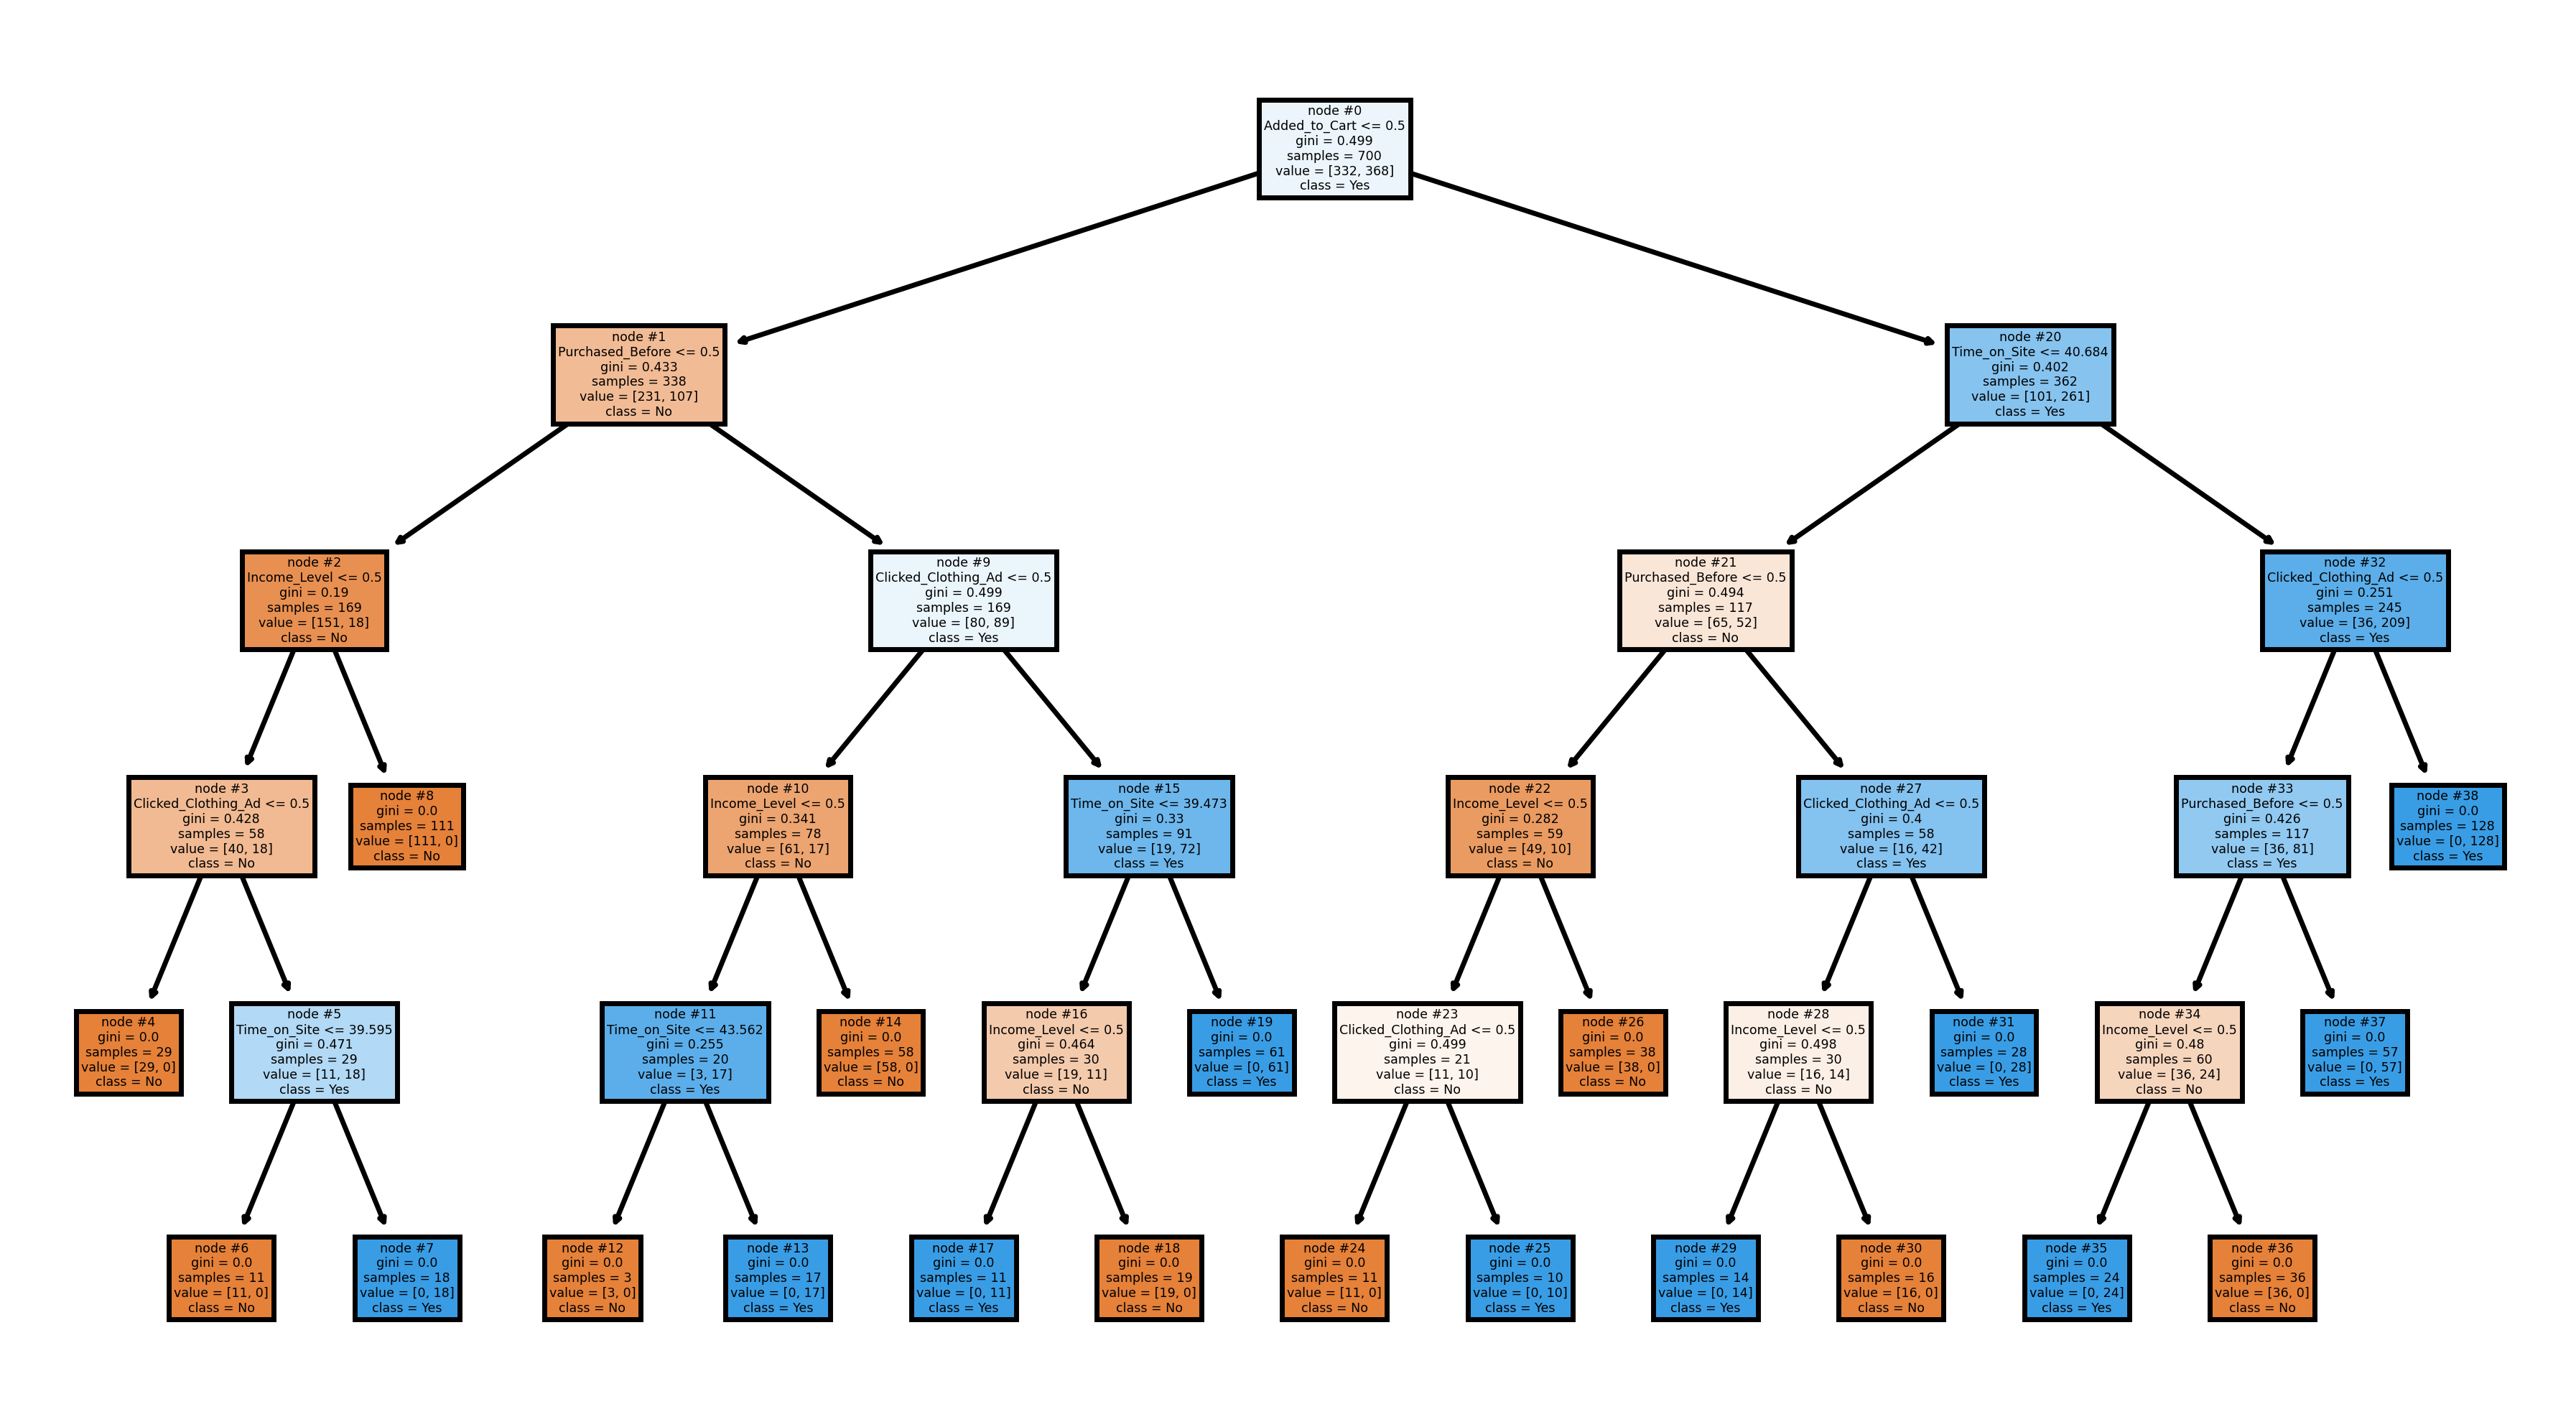

In [31]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (9,5), dpi=500)
plot_tree(dt,  
               feature_names = independent_variable,  
               class_names = ['No', 'Yes'], 
               filled = True, 
              node_ids=True)


In [32]:
train['Predicted'] = dt.predict(X_train)
train.head()

Purchase  Age  Website_Visits  Time_on_Site  Clicked_Clothing_Ad  \
806         1   57               6     69.592261                    1   
545         0   26               3      6.849864                    1   
792         1   42               6     48.485814                    0   
827         1   27              18     56.674053                    1   
367         1   28              43     50.039140                    0   

     Added_to_Cart  Email_Discount_Received  Purchased_Before  Gender  \
806              0                        0                 1       0   
545              0                        0                 1       0   
792              1                        1                 0       0   
827              0                        1                 1       0   
367              1                        1                 1       1   

     Income_Level  Product_Viewed  Predicted  
806             1               3          1  
545             1               3          0  
792             0               1          1  
827             1               0          1  
367             1               0          1

# Model Performance Metrics

In [34]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Purchase'])
print(matrix)

[[332   0]
 [  0 368]]


In [37]:
Accuracy_Train=((332+368)/(700)*100)
print(Accuracy_Train)

100.0


In [38]:
from sklearn.metrics import classification_report

print(classification_report(train['Purchase'],train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       368

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



### Model Improvement by Pruning Method [ Cut Tree]

In [53]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',  
                                 min_samples_split=100, 
                                 min_samples_leaf=60,
                                 max_depth=5)  
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=60, min_samples_split=100)

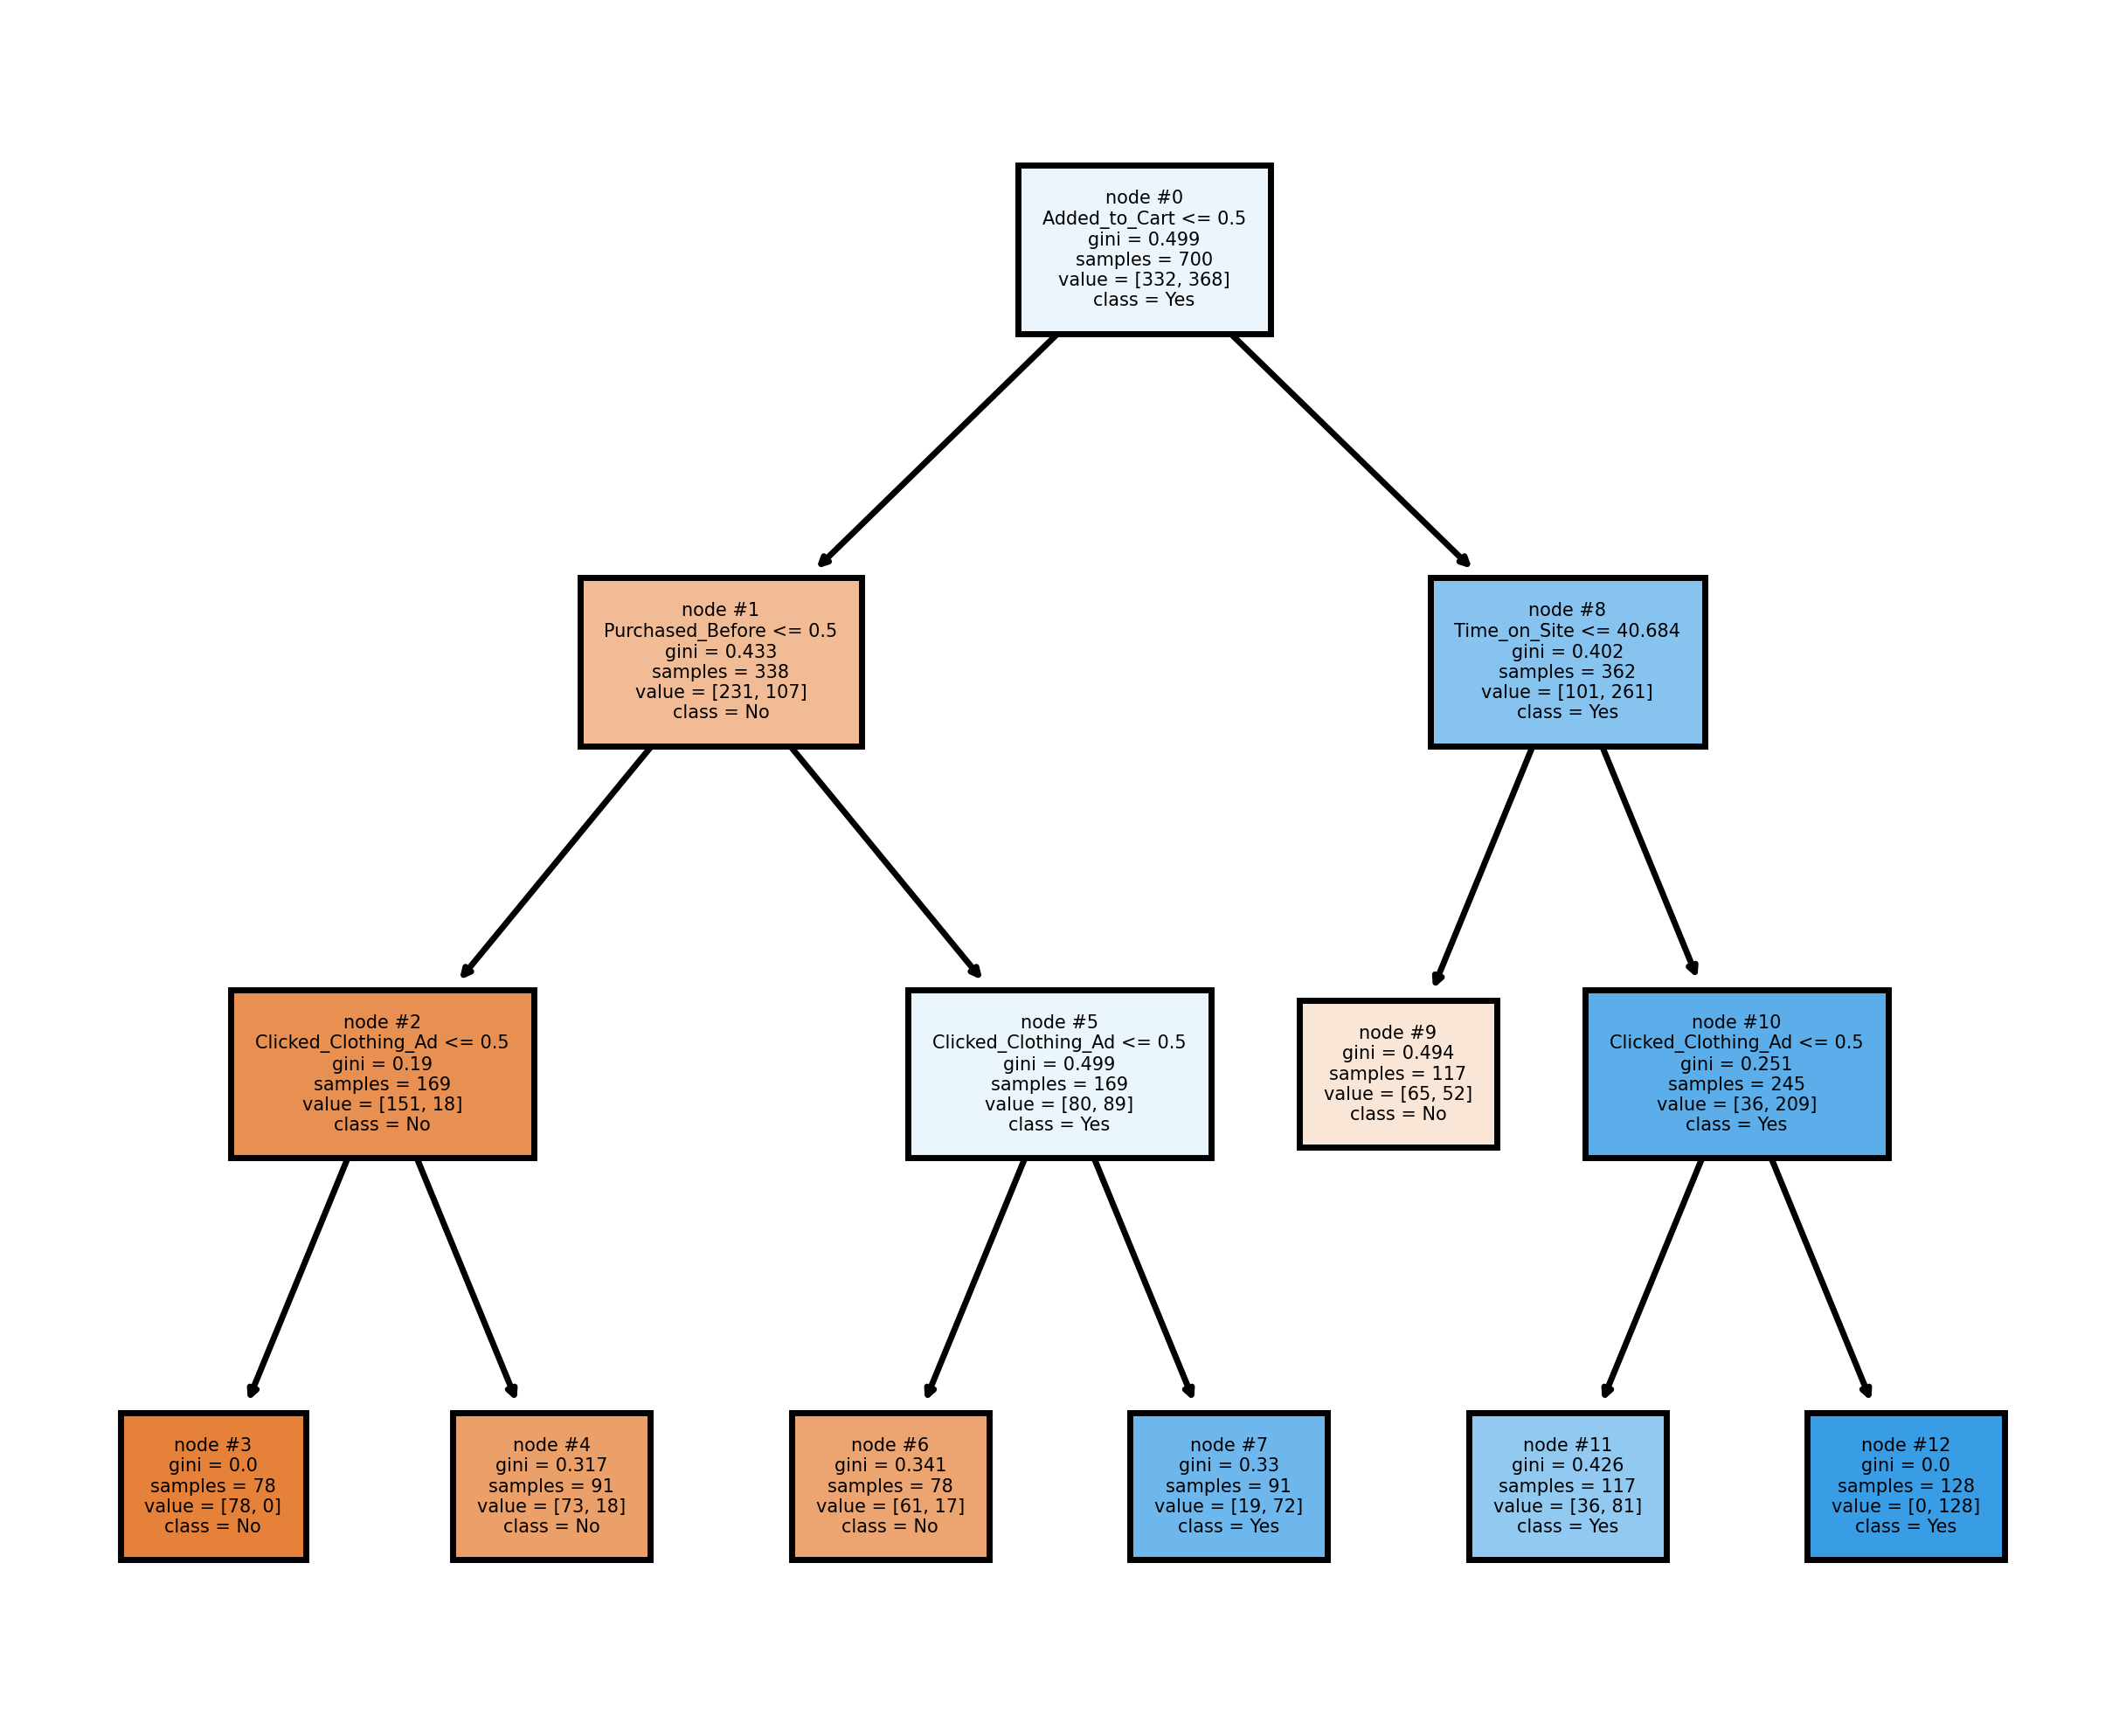

In [54]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,5), dpi=500)
tree.plot_tree(dt,  
               feature_names = independent_variable,  
               class_names = ['No', 'Yes'], 
               filled = True, 
               node_ids = True, 
               fontsize=3); 

In [55]:
train['Predicted'] = dt.predict(X_train) 
train.head()

Purchase  Age  Website_Visits  Time_on_Site  Clicked_Clothing_Ad  \
806         1   57               6     69.592261                    1   
545         0   26               3      6.849864                    1   
792         1   42               6     48.485814                    0   
827         1   27              18     56.674053                    1   
367         1   28              43     50.039140                    0   

     Added_to_Cart  Email_Discount_Received  Purchased_Before  Gender  \
806              0                        0                 1       0   
545              0                        0                 1       0   
792              1                        1                 0       0   
827              0                        1                 1       0   
367              1                        1                 1       1   

     Income_Level  Product_Viewed  Predicted  
806             1               3          1  
545             1               3          1  
792             0               1          1  
827             1               0          1  
367             1               0          1

In [56]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Purchase'])
print(matrix)

[[277  87]
 [ 55 281]]


In [57]:
Accuracy_Train=((277  +281)/(700)*100)
print(Accuracy_Train)

79.71428571428572


In [58]:
from sklearn.metrics import classification_report
print(classification_report(train['Purchase'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80       332
           1       0.84      0.76      0.80       368

    accuracy                           0.80       700
   macro avg       0.80      0.80      0.80       700
weighted avg       0.80      0.80      0.80       700



# Predictions on Test Dataset

In [59]:
test = pd.concat([X_test,y_test],axis=1)
test.head()

Age  Website_Visits  Time_on_Site  Clicked_Clothing_Ad  Added_to_Cart  \
110   45              28     55.083445                    1              1   
637   49              21     28.063186                    0              1   
87    23               1     21.310615                    1              0   
428   49              21     27.187884                    1              0   
672   52              22     71.437814                    0              0   

     Email_Discount_Received  Purchased_Before  Gender  Income_Level  \
110                        1                 0       0             2   
637                        0                 1       0             1   
87                         1                 1       1             0   
428                        0                 1       0             0   
672                        1                 1       0             0   

     Product_Viewed  Purchase  
110               4         1  
637               3         0  
87                4         1  
428               0         1  
672               3         1

In [60]:
test['Predicted'] = dt.predict(X_test)
test.head()

Age  Website_Visits  Time_on_Site  Clicked_Clothing_Ad  Added_to_Cart  \
110   45              28     55.083445                    1              1   
637   49              21     28.063186                    0              1   
87    23               1     21.310615                    1              0   
428   49              21     27.187884                    1              0   
672   52              22     71.437814                    0              0   

     Email_Discount_Received  Purchased_Before  Gender  Income_Level  \
110                        1                 0       0             2   
637                        0                 1       0             1   
87                         1                 1       1             0   
428                        0                 1       0             0   
672                        1                 1       0             0   

     Product_Viewed  Purchase  Predicted  
110               4         1          1  
637               3         0          0  
87                4         1          1  
428               0         1          1  
672               3         1          0

# Model Performance Metrics on Test data 

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Purchase'])
print(confusion_matrix)

[[113  49]
 [ 26 112]]


In [62]:
Accuracy_test=((113+112)/(300)*100)
Accuracy_test

75.0

# Sensitivity & Specificity

#### Train

In [64]:
from sklearn.metrics import classification_report
print(classification_report(train['Purchase'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.76      0.83      0.80       332
           1       0.84      0.76      0.80       368

    accuracy                           0.80       700
   macro avg       0.80      0.80      0.80       700
weighted avg       0.80      0.80      0.80       700



#### Test

In [65]:
from sklearn.metrics import classification_report
print(classification_report(test['Purchase'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       139
           1       0.81      0.70      0.75       161

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.76      0.75      0.75       300

